## <b> ■ 복습 </b>
    1장. Numpy
    2장. 퍼셉트론
    3장. 신경망 (저자가 만든 가중치로 3층 신경망 구현)
    4장. 신경망 구현 (직접 학습시켜 2층 신경망 구현 - 수치미분)
        수치미분으로 신경망을 학습 시키기에는 너무 시간이 많이 걸린다
    5장. 신경망 구현 (직접 학습시켜 2층 신경망 구현 - 오차역전파)
        신경망의 함수들의 도함수를 만들어서 역전파 함수로 구현하고 오차를 역전파해서 마지막에는 가중치 행렬(W1, W2)를 변경하게끔 구현
         
                 Affine1(W1)+b1                Affine2(W2)+b2
        입력층 ------------------> 시그모이드 ------------------> 시그모이드 ------------------> 소프트맥스 ------------------> 교차 엔트로피
                                       ↓                           ↓                            ↓                              ↓
                                     도함수                        도함수                        도함수                           도함수
                     <----------------------------------------------------------------------------------------------------------------------- 비용(역전파)

    면접문제: 수치미분과 오차역전파의 차이가 무엇인가?
        답: 
        
### <b>■ 신경망안에 들어가는 함수를 클래스로 구성</b>
    클래스 구성>                    
    1. ReLU 함수 클래스               모든 클래스별로
    2. Sigmoid 함수                   순전파 / 역전파    
    3. Affine 계층                      함수를 구현
    4. Softmax 함수
    5. Cross Entropy
    
### <b>■ Softmax 함수 클래스 구현 및 Cross Entropy 함수 클래스 구현 (Softmax with Loss) </b>
    1. 소프트맥스 함수 식
    2. 소프트맥스 함수 계산그래프
    3. 교차 엔트로피 함수 식
    4. 교차 엔트로피 함수 계산 그래프
    5. 소프트맥스 + 교차 엔트로피 묶어서 코드 구현
![soft-cross1](http://cfile271.uf.daum.net/image/999678455F3074570A379A)
![soft-cross2](http://cfile296.uf.daum.net/image/998D43455F3073720A1C81)
![soft-cross3](http://cfile287.uf.daum.net/image/9908BD4A5F30748F0BFDBE)

### ※ 문제81. 책 179페이지의 SoftmaxWithLoss 클래스를 생성하고 구현하시오

In [2]:
from common.functions import *

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.x = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

t = np.array([0,0,1,0,0,0,0,0,0,0])  # 숫자 2

x1 = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.3,0.1,0.5])
x2 = np.array([0.01,0.01,0.9,0.01,0.01,0.01,0.01,0.01,0.01,0.02])

soft = SoftmaxWithLoss()

print (soft.forward(x1,t))
print (soft.backward()) 

print (soft.forward(x2,t))
print (soft.backward() )

2.4063467509023186
[ 0.00901439  0.00901439 -0.09098561  0.00901439  0.00901439  0.00901439
  0.00928892  0.01204708  0.00986332  0.01471434]
1.5475681948007376
[ 0.0087373   0.0087373  -0.07872354  0.0087373   0.0087373   0.0087373
  0.0087373   0.0087373   0.0087373   0.00882511]


### <b>■ orderdict의 이해</b>
    OrderedDict는 일반 Dictionary와 다르게 입력된 데이터 뿐만 아니라 입력된 순서까지 같아야 동일한 것으로 판단

In [6]:
# 예제:  일반 딕셔너리 예제
print (' dict : ')

d1 = {}
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
d1['e'] = 'E'

d2 = {}
d2['e'] = 'E'
d2['d'] = 'D'
d2['c'] = 'C'
d2['b'] = 'B' 
d2['a'] = 'A'

print (d1) # {'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}
print (d2) # {'e': 'E', 'd': 'D', 'c': 'C', 'b': 'B', 'a': 'A'}

print ( d1 == d2 )  # True  

# OrderDict() 를 테스트 
from collections import OrderedDict

print('\n')
print ('OrderDict : ')

d1 = collections.OrderedDict()
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
d1['e'] = 'E'

d2 = collections.OrderedDict()
d2['e'] = 'E'
d2['d'] = 'D'
d2['c'] = 'C'
d2['b'] = 'B' 
d2['a'] = 'A'

print (d1)
print (d2) 

OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])
OrderedDict([('e', 'E'), ('d', 'D'), ('c', 'C'), ('b', 'B'), ('a', 'A')])

print (d1 == d2)  # False 

 dict : 
{'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}
{'e': 'E', 'd': 'D', 'c': 'C', 'b': 'B', 'a': 'A'}
True


OrderDict : 
OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])
OrderedDict([('e', 'E'), ('d', 'D'), ('c', 'C'), ('b', 'B'), ('a', 'A')])
False


    OrderDictionary는 순서까지 같아야 같은 데이터로 인식
    
    신경망에서는 순서가 아주 중요
        순전파로 갔던 길 그대로 역전파가 되어야하기 때문
    
    순전파 : 입력값 --> Affine1 --> ReLU --> Affine2 --> ReLU --> Affine3 --> Lastlayer(SoftmaxWithLoss) --> 오차
    역전파 : 오차(1) --> LastLayer --> Affine3 --> ReLU --> Affine2 --> ReLU --> Affine1
    
    ※ 순전파의 순서를 반대로(reverse)해서 역전파 될 수 있도록 OrderedDict 함수를 신경망 코드에 사용해야한다

train acc, test acc | 0.114, 0.1063
train acc, test acc | 0.9039666666666667, 0.9035
train acc, test acc | 0.9252, 0.9265
train acc, test acc | 0.9353833333333333, 0.935
train acc, test acc | 0.94615, 0.9441
train acc, test acc | 0.9521666666666667, 0.9479
train acc, test acc | 0.9570166666666666, 0.9518
train acc, test acc | 0.9608833333333333, 0.9572
train acc, test acc | 0.9652833333333334, 0.9601
train acc, test acc | 0.9674666666666667, 0.9625
train acc, test acc | 0.9703, 0.9655
train acc, test acc | 0.97315, 0.9682
train acc, test acc | 0.97365, 0.9667
train acc, test acc | 0.9748666666666667, 0.9689
train acc, test acc | 0.9766666666666667, 0.9711
train acc, test acc | 0.9784666666666667, 0.9711
train acc, test acc | 0.9775666666666667, 0.9701


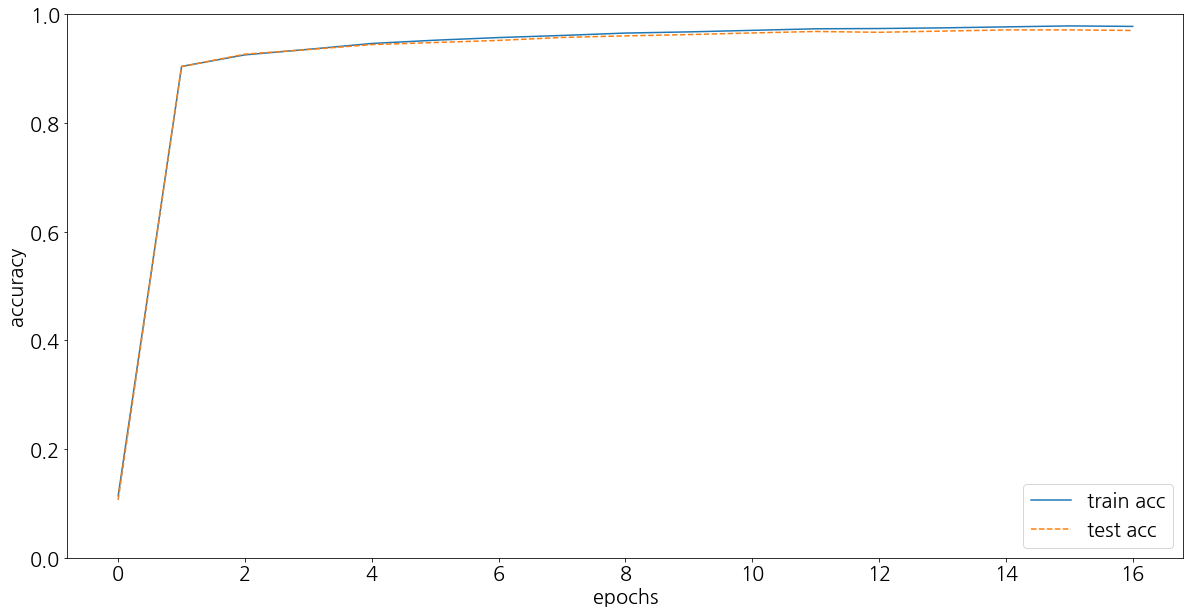

In [10]:
# 예제1. 오차역전파를 이용한 2층 신경망 전체코드를 구현하시오
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

    2층 신경망의 큰 그림
        1. TwoLayerNet 클래스
            - 초기화 함수 : 가중치와 바이어스 초기값 세팅
            - predict 함수
            - loss 함수 : predict를 호출해서 예측값을 뽑아내고 예측값과 target값을 lastlayer의 forward함수에 넣어서 오차를 출력
            - accuracy 함수 : 신경망의 성능을 확인하기 위해서 정확도 체크를 위한 함수
            - gradient 함수 : 오차함수를 실행하는 함수. 역전파를 진행하는 코드(가중치 갱신)
            
        2. 클래스를 객체화 시켜서 신경망 구현하는 코드
```python
            network = TwoLayerNet(input_size = 50, hidden_size = 50, output_size = 10) # 2층 신경망
    
            for i in range(len(x)/batch_size): # len(x)/batch_size : epoch 크기
                grad = network.gradient(x, t)
                for key in ('W1','b1','W2','b2'):
                    network.params[key] -= lr*grad[key]
```        
            구현 결과를 시각화 하는 코드
                훈련 데이터의 정확도와 테스트 데이터의 정확도를 비교해서 시각화하여 오버피팅이 생기는지 확인
                

### ※ 문제82. 위의 2층 신경망의 활성화 함수를 시그모이드가 아닌 현업에서 많이 쓰는 ReLU로 변경하고 정확도를 보시오
    시그모이드 -> ReLU
    ReLU -> 시그모이드

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7853666666666667, 0.787
train acc, test acc | 0.8766833333333334, 0.8812
train acc, test acc | 0.8985, 0.9005
train acc, test acc | 0.9068666666666667, 0.9091
train acc, test acc | 0.9137666666666666, 0.916
train acc, test acc | 0.9200166666666667, 0.9209
train acc, test acc | 0.9233166666666667, 0.9239
train acc, test acc | 0.9262166666666667, 0.9284
train acc, test acc | 0.9298333333333333, 0.9318
train acc, test acc | 0.93345, 0.9334
train acc, test acc | 0.93605, 0.9347
train acc, test acc | 0.93855, 0.9372
train acc, test acc | 0.9409333333333333, 0.94
train acc, test acc | 0.94255, 0.9419
train acc, test acc | 0.9445666666666667, 0.9436
train acc, test acc | 0.9465, 0.9452


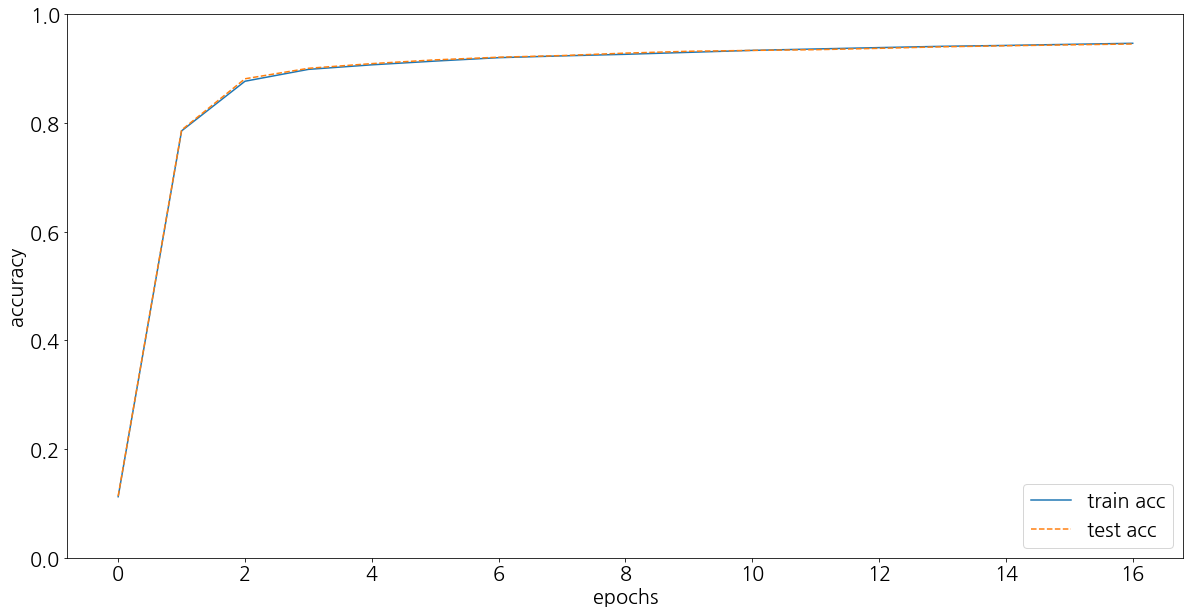

In [11]:
# 시그모이드
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.114, 0.1063
train acc, test acc | 0.9039666666666667, 0.9035
train acc, test acc | 0.9252, 0.9265
train acc, test acc | 0.9353833333333333, 0.935
train acc, test acc | 0.94615, 0.9441
train acc, test acc | 0.9521666666666667, 0.9479
train acc, test acc | 0.9570166666666666, 0.9518
train acc, test acc | 0.9608833333333333, 0.9572
train acc, test acc | 0.9652833333333334, 0.9601
train acc, test acc | 0.9674666666666667, 0.9625
train acc, test acc | 0.9703, 0.9655
train acc, test acc | 0.97315, 0.9682
train acc, test acc | 0.97365, 0.9667
train acc, test acc | 0.9748666666666667, 0.9689
train acc, test acc | 0.9766666666666667, 0.9711
train acc, test acc | 0.9784666666666667, 0.9711
train acc, test acc | 0.9775666666666667, 0.9701


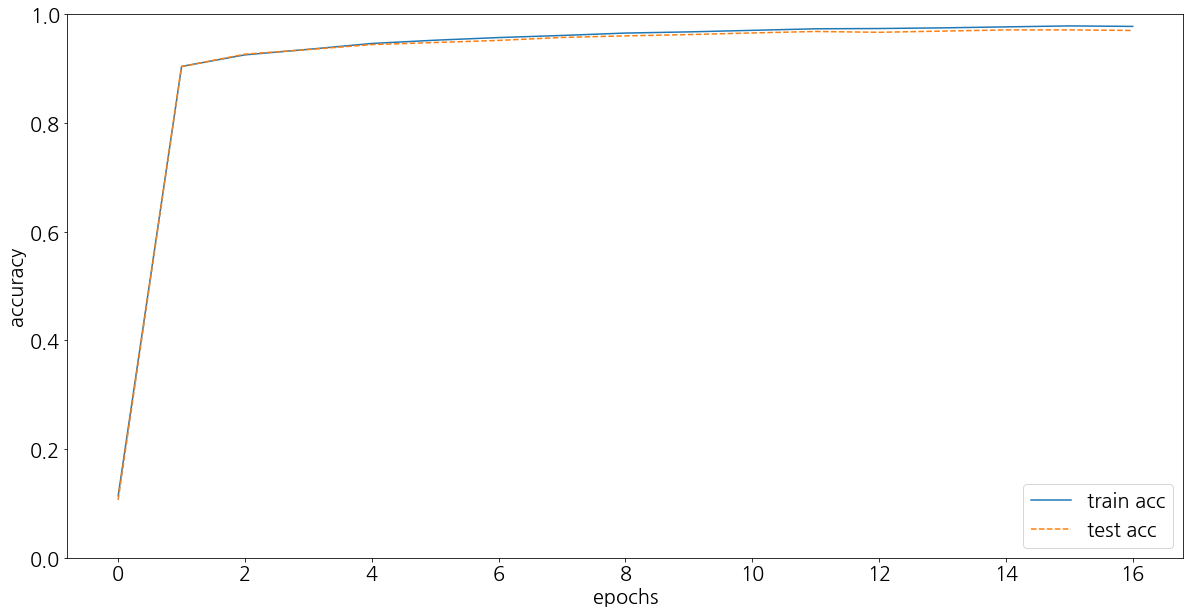

In [10]:
# ReLU
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ※ 문제83. 신경망의 성능을 확인하는 마지막 시각화 그래프가 정확도가 아니라 loss(오차)로 출력되게 하시오

train acc, test acc | 0.09376666666666666, 0.0957, 2.3025704797934696
train acc, test acc | 0.9070166666666667, 0.9103, 0.3204938057746957
train acc, test acc | 0.92505, 0.9262, 0.25982388187100086
train acc, test acc | 0.93755, 0.9379, 0.21625226566554426
train acc, test acc | 0.9443333333333334, 0.9441, 0.19952511676762327
train acc, test acc | 0.9507833333333333, 0.951, 0.1719925717726898
train acc, test acc | 0.9545, 0.9532, 0.15872904611221178
train acc, test acc | 0.9603666666666667, 0.9582, 0.14287426139566875
train acc, test acc | 0.964, 0.9616, 0.13353369298000972
train acc, test acc | 0.9660666666666666, 0.9614, 0.12816550414873462
train acc, test acc | 0.9698166666666667, 0.965, 0.12149858534303175
train acc, test acc | 0.9707166666666667, 0.9669, 0.11385447615570149
train acc, test acc | 0.97255, 0.9694, 0.11129534290815066
train acc, test acc | 0.9746666666666667, 0.9688, 0.10579151954324291
train acc, test acc | 0.9764833333333334, 0.9704, 0.10394391976139118
train acc, t

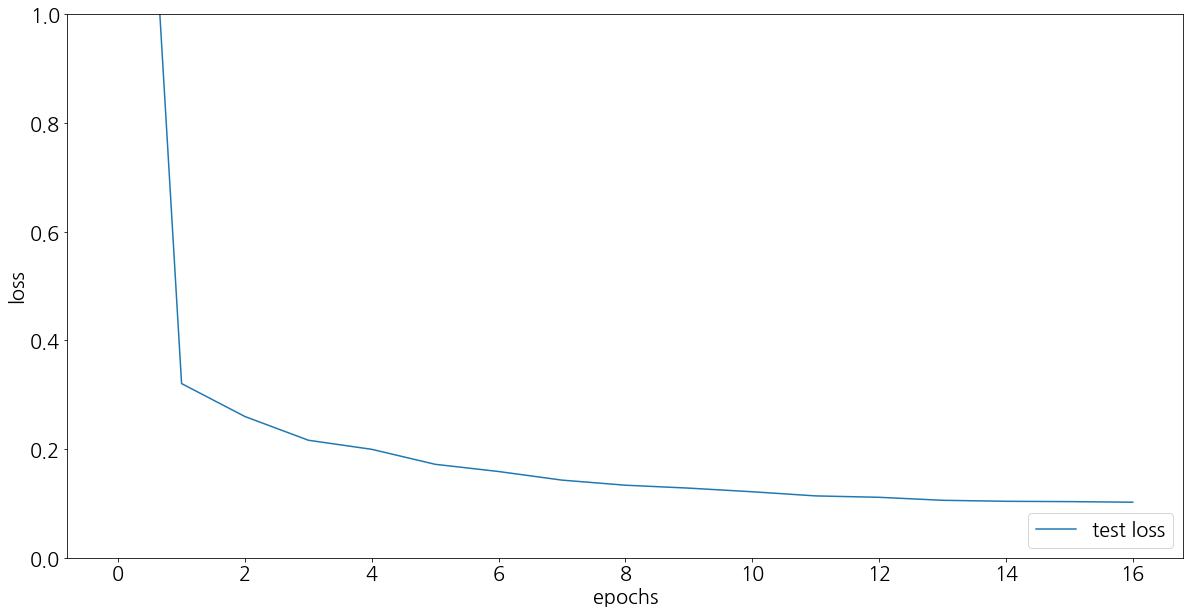

In [13]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
test_loss_list = []
# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        test_loss = network.loss(x_test, t_test)
        test_loss_list.append(test_loss)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc) + ", "+ str(test_loss))

# 그래프 그리기
markers = {'loss': 'o'}
x = np.arange(len(train_acc_list))
plt.plot(x, test_loss_list, label='test loss')
# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### ※ 문제84. (점심시간 문제) 위의 신경망을 2층이 아니라 3층으로 변경하시오
    은닉층의 노드수는 편하게 정하시오

train acc, test acc | 0.10235, 0.102
train acc, test acc | 0.7718166666666667, 0.7798
train acc, test acc | 0.8960666666666667, 0.899
train acc, test acc | 0.925, 0.9225
train acc, test acc | 0.9452833333333334, 0.9453
train acc, test acc | 0.95385, 0.9489
train acc, test acc | 0.9606166666666667, 0.9544
train acc, test acc | 0.9683166666666667, 0.9601
train acc, test acc | 0.9700833333333333, 0.962
train acc, test acc | 0.97445, 0.9644
train acc, test acc | 0.9707, 0.9613
train acc, test acc | 0.9795833333333334, 0.969
train acc, test acc | 0.9788666666666667, 0.9679
train acc, test acc | 0.9816666666666667, 0.9686
train acc, test acc | 0.98445, 0.9722
train acc, test acc | 0.9854166666666667, 0.9692
train acc, test acc | 0.9844333333333334, 0.9691


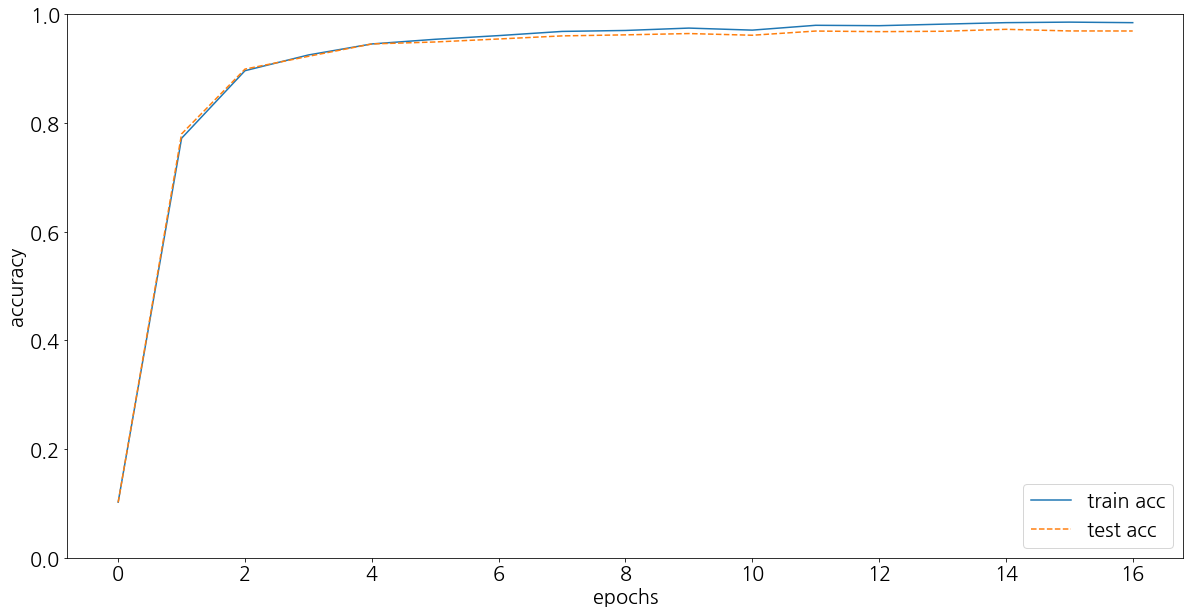

In [16]:
# ReLU
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 20})

class TwoLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2)
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size1=50, hidden_size2=100, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()